# 19. Morphological operations

In [55]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

sys.path.insert(0, '..')

from utils import show_image

plt.rcParams['figure.figsize'] = [8, 10]

The following image is the result of the application of a segmentation technique to an image containing a set of almost circular, convex objects.

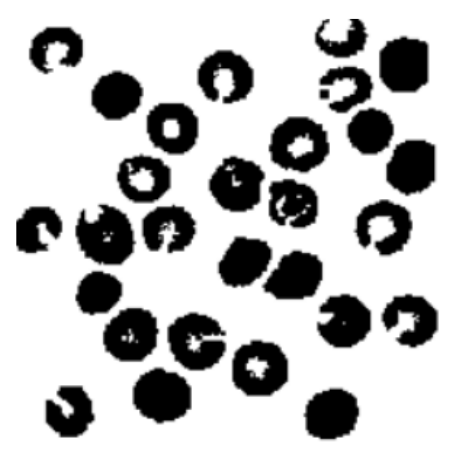

In [56]:
image = cv2.imread("Images/objects.png")

show_image(image)

### **a)** Use morphological operations to try to recover the original shape of the objects.

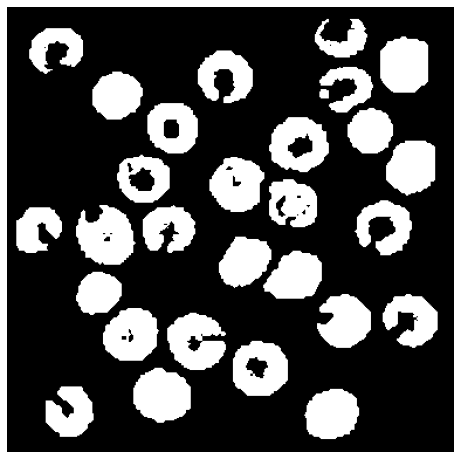

In [57]:
_, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

show_image(image)

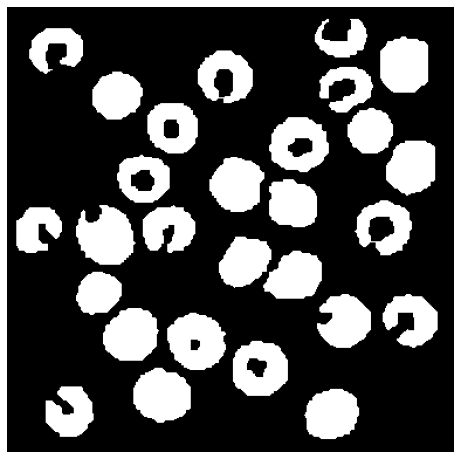

In [58]:
kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

show_image(closing)

### **b)** Compare the results with those obtained by calculating the convex hull of the objects

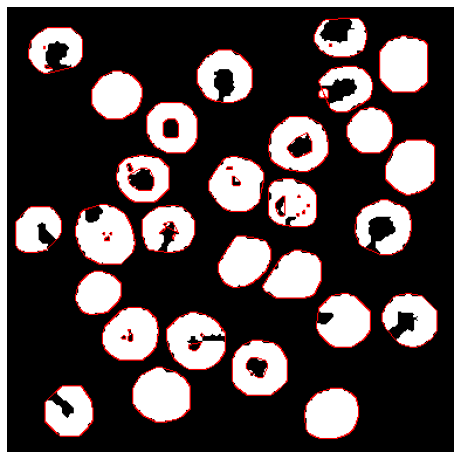

In [59]:
edges = cv2.Canny(image, 100, 200)
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
hulls = []

for contour in contours:
    hulls.append(cv2.convexHull(contour))

cv2.drawContours(image, hulls, -1, (0, 0, 255))

show_image(image)